In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
import urllib

json_local = os.path.join('data', 'sarcasm', 'sarcasm.json')
json_url = 'https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json'

if not os.path.exists(json_local):
    urllib.request.urlretrieve(json_url, json_local)

In [6]:
import json

with open(json_local) as file:
    data = json.load(file)
    
hls, lbs = [], []

for e in data:
    hls.append(e['headline'])
    lbs.append(e['is_sarcastic'])
    
lbs = np.array(lbs)

In [4]:
num_words = 10000
embed_d = 16
maxlen = 32
trn_size = 20000

In [7]:
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(hls)

sqs = tokenizer.texts_to_sequences(hls)
sqs = pad_sequences(sqs, padding='post', maxlen=maxlen, truncating='post')

In [8]:
trn_sqs, val_sqs = sqs[:trn_size], sqs[trn_size:]
trn_lbs, val_lbs = lbs[:trn_size], lbs[trn_size:]

In [12]:
model = keras.models.Sequential([
    keras.layers.Embedding(num_words, embed_d, input_length=maxlen),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [13]:
%%time

history = model.fit(trn_sqs, trn_lbs, epochs=10, validation_data=(val_sqs, val_lbs))

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5568 - accuracy: 0.7035 - val_loss: 0.3896 - val_accuracy: 0.8423
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3043 - accuracy: 0.8776 - val_loss: 0.3443 - val_accuracy: 0.8508
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2269 - accuracy: 0.9117 - val_loss: 0.3447 - val_accuracy: 0.8541
Epoch 4/10
625/625 [==============================] - 2s 2ms/step - loss: 0.1822 - accuracy: 0.9308 - val_loss: 0.3671 - val_accuracy: 0.8548
Epoch 5/10
625/625 [==============================] - 2s 2ms/step - loss: 0.1506 - accuracy: 0.9454 - val_loss: 0.4375 - val_accuracy: 0.8378
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1268 - accuracy: 0.9560 - val_loss: 0.4427 - val_accuracy: 0.8475
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 0.1086 - accuracy: 0.9609 - val_loss: 0.4832 - val_accuracy: 0.8426
Epoch 

In [14]:
import utilities

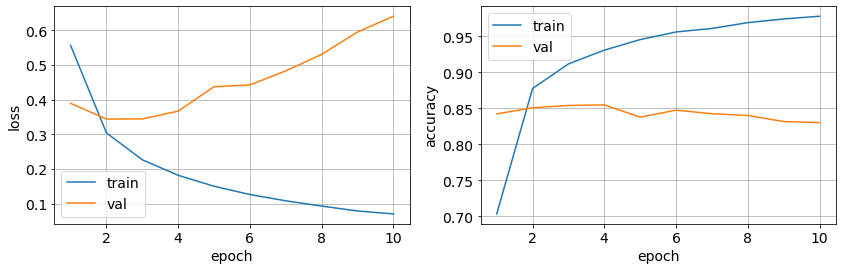

In [15]:
utilities.plot_train_val_metrics(history, metrics=['loss', 'accuracy'])

In [19]:
utilities.save_tsv(model, tokenizer, os.path.join('data', 'sarcasm', 'sarcasm'))

In [20]:
num_words = 1000
maxlen = 32

tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(hls)

sqs = tokenizer.texts_to_sequences(hls)
sqs = pad_sequences(sqs, padding='post', maxlen=maxlen, truncating='post')

trn_sqs, val_sqs = sqs[:trn_size], sqs[trn_size:]
trn_lbs, val_lbs = lbs[:trn_size], lbs[trn_size:]

model2 = keras.models.Sequential([
    keras.layers.Embedding(num_words, embed_d, input_length=maxlen),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 32, 16)            16000     
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5720 - accuracy: 0.6908 - val_loss: 0.4393 - val_accuracy: 0.7948
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8209 - val_loss: 0.4137 - val_accuracy: 0.8037
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3689 - accuracy: 0.8345 - val_loss: 0.3964 - val_accuracy: 0.8155
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8359 - val_loss: 0.3984 - val_accuracy: 0.8185
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3555 - accuracy: 0.8368 - val_loss: 0.3978 - val_accuracy: 0.8135
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8390 - val_loss: 0.3978 - val_accuracy: 0.8150
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3517 - accuracy: 0.8386 - val_loss: 0.4002 - val_accuracy: 0.8179
Epoch 

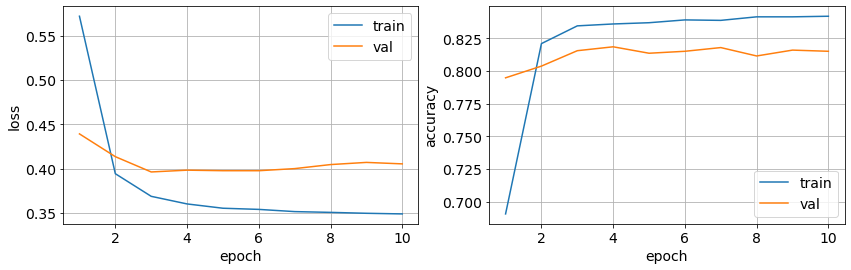

In [21]:
%%time

history2 = model2.fit(trn_sqs, trn_lbs, epochs=10, validation_data=(val_sqs, val_lbs))
utilities.plot_train_val_metrics(history2, metrics=['loss', 'accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 16, 16)            16000     
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 24)                408       
                                                                 
 dense_13 (Dense)            (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5178 - accuracy: 0.7423 - val_loss: 0.40

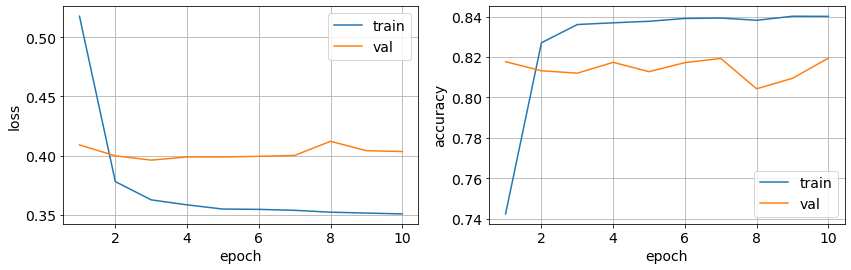

In [24]:
num_words = 1000
maxlen = 16

tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(hls)

sqs = tokenizer.texts_to_sequences(hls)
sqs = pad_sequences(sqs, padding='post', maxlen=maxlen, truncating='post')

trn_sqs, val_sqs = sqs[:trn_size], sqs[trn_size:]
trn_lbs, val_lbs = lbs[:trn_size], lbs[trn_size:]

model3 = keras.models.Sequential([
    keras.layers.Embedding(num_words, embed_d, input_length=maxlen),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model3.summary()

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model3.fit(trn_sqs, trn_lbs, epochs=10, validation_data=(val_sqs, val_lbs))
utilities.plot_train_val_metrics(history3, metrics=['loss', 'accuracy'])